In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Variáveis do Sistema

In [ ]:
# Fluidos do processo
rho = 1000  # Kg/m^3
q = 0.001   # m^3/s
cp = 4180   # J(/Kg.K)
Te = 300    # K
V = 0.2     # m^3

# Resistência do Zinco
rhor = 7140 # Kg/m^3
Vr = 0.0003 # m^3
cpr = 382   # J(/Kg.K)
hr = 1180   # Coeficiente de transferência de calor entre o fluido e o metal
Ar = 0.1    # m^2

# Valor inicial da Variável Manipulada
Q_barra = 10000 # Watts(J/s)

# Condições Iniciais
T0 = 302.39  # K
Tr0 = 387.14 # K


Função EDO's

In [ ]:
def FuncaoTanque(M,t):

  '''
  qlkjçljkf
  M: vairiai
  '''
  T,Tr = M
  dT_dt = (rho*q*cp*(Te - T) + hr*Ar*(Tr - T))/(rho*V*cp)
  dTr_dt = (Q - hr*Ar*(Tr - T))/(rhor*Vr*cpr)
  
  return(dT_dt, dTr_dt)

Implementação do PID

In [25]:
Tset = 320  # K

num = 5
delta_t = 50
t0 = 0
I = 0   # O valor integrador é 0 na primeira iteração
T_vetor = []
tempo = []
M = []
t_vetor = []
Kc = 10
TauI = 0.2
TauD = 2  # com erro = 0 não existe ação de controle na primeira iteração
e = 0
e_anterior = 0
T0 = 302.39
Tr0 = 387.14

ne = 80
for i in range(0,ne):
    P = e 
    I = e*delta_t + I
    D = (e-e_anterior)/delta_t
    Q = Q_barra + Kc*(P + (1/TauI)*I + TauD*D) # equação do controle PID

    tf = t0 + delta_t
    t = np.linspace(t0,tf,num)
    M = odeint(FuncaoTanque,[T0, Tr0],t) 
    t0 = tf

    T = M[:,0]
    Tr = M[:,1]
    e = Tset - T[num-1]             # calcula o erro atual, T_vetor[num-1] é o ultimo elemento do vetor
    e_anterior = Tset - T[0]        # calcula o erro anterior, T_vetor[0] é o primeiro elemento do vetor
    T0 = T[num-1]
    Tr0 = Tr[num-1]

    T_vetor = np.append(T_vetor,T)  # adiciona o vetor menor T no final do vetor maior T_vetor (Temperatura)
    t_vetor = np.append(t_vetor,t)  # adiciona o vetor menor t no final do vetor maior t_vetor (Tempo)

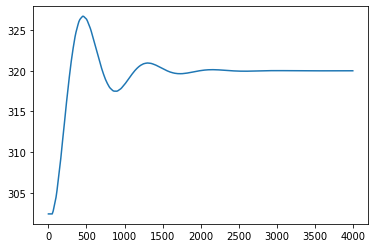

In [26]:
plt.plot(t_vetor,T_vetor)